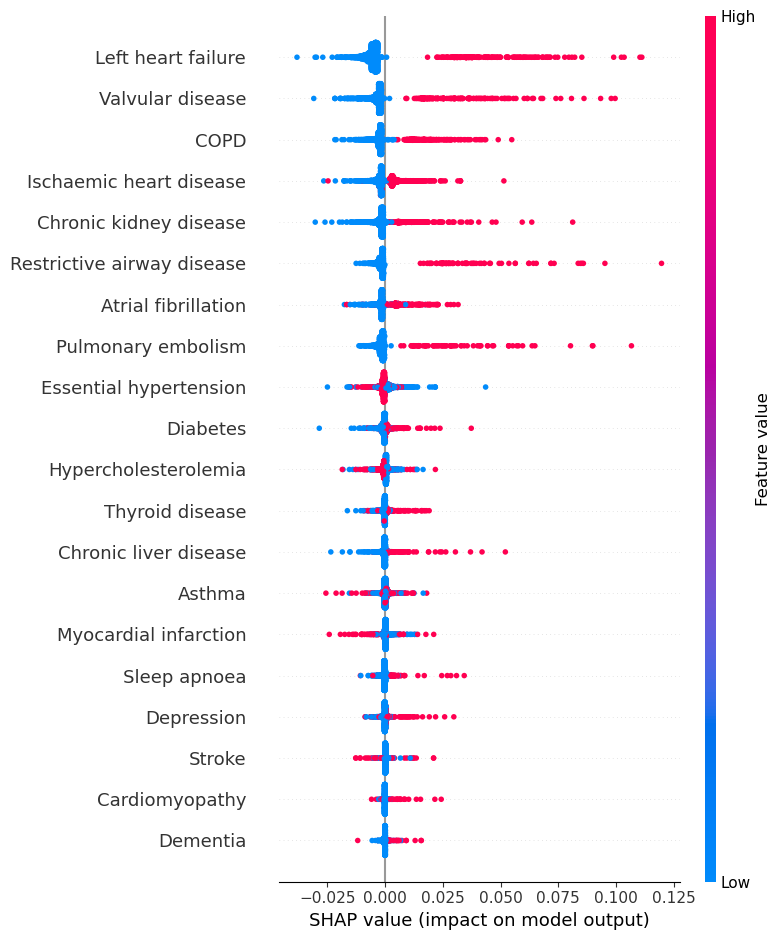

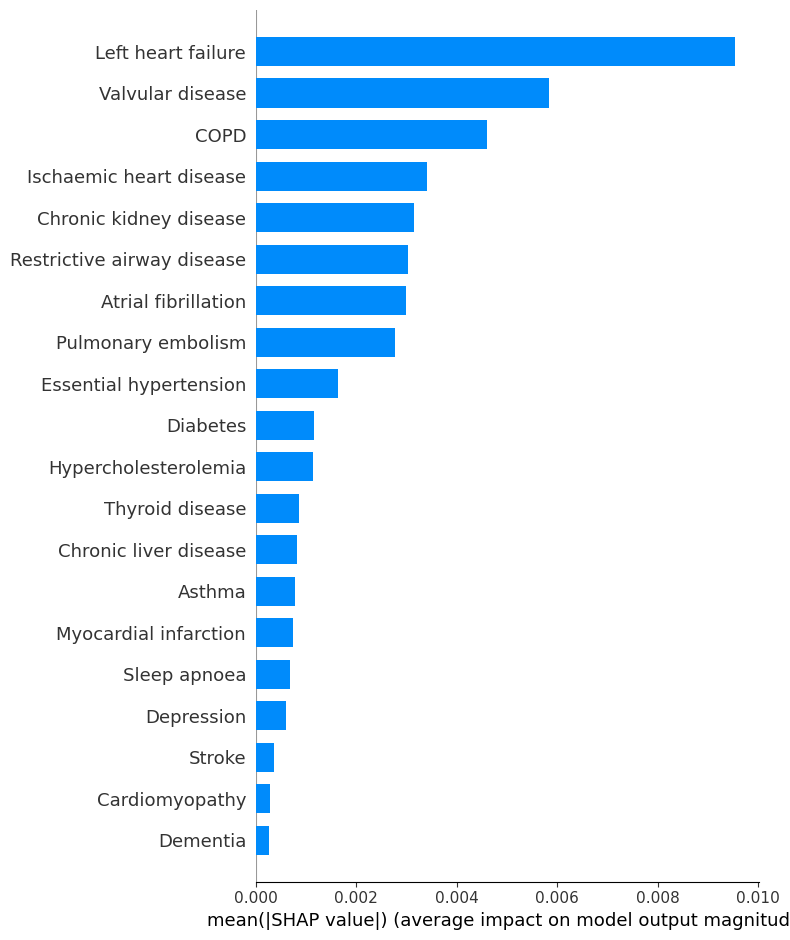

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import shap
import numpy as np

df = pd.read_csv("Matched_Cohort.csv")

# encode 'Sex' and 'Ethnicity' columns
label_encoders = {}
for col in ['Sex', 'Ethnicity']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # store encoder if needed later



# Split into features and target
X = df_sample.drop("PH", axis=1)
y = df_sample["PH"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest with best parameters
model = RandomForestClassifier(max_depth=10, n_estimators=300, random_state=42)
model.fit(X_train, y_train)

# SHAP analysis
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)  # shape: (n_samples, n_features, n_classes)

# SHAP plots for class 1 (PH)
shap.summary_plot(shap_values[:, :, 1], X_test)                    # Beeswarm 
shap.summary_plot(shap_values[:, :, 1], X_test, plot_type="bar")   # Bar 

/opt/anaconda3/envs/python_course/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


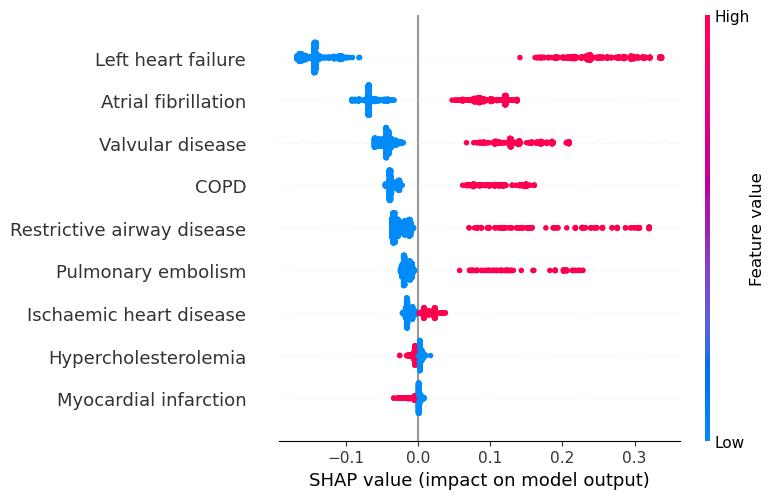

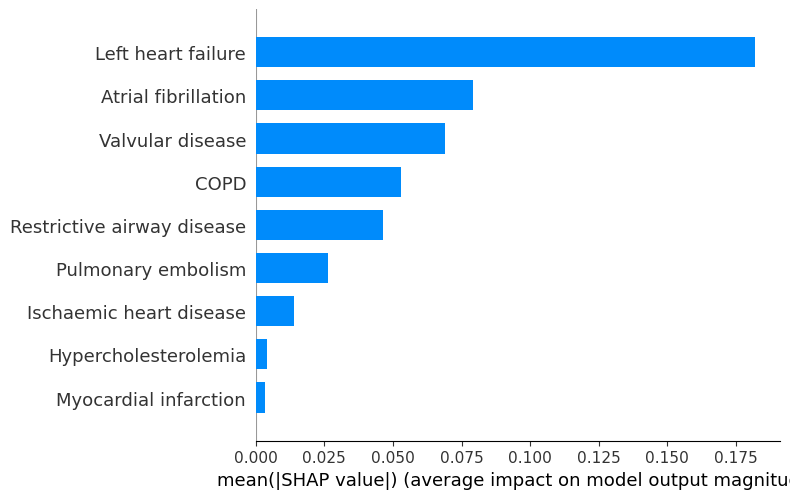

In [1]:
import pandas as pd
import shap
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

df = pd.read_csv("Matched_Cohort.csv")

# 1. Encode categorical variables manually (not one-hot) for consistency with earlier SHAP
from sklearn.preprocessing import LabelEncoder
label_encoders = {}
for col in ['Sex', 'Ethnicity']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# 2. Define top 10 SHAP-selected features
top_10_features = [
    'Left heart failure',
    'Atrial fibrillation',
    'Valvular disease',
    'COPD',
    'Restrictive airway disease',
    'Pulmonary embolism',
    'Myocardial infarction',
    'Hypercholesterolemia',
    'Ischaemic heart disease'
]

# 3. Subset data
X = df[top_10_features]
y = df['PH']

# 4. Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Train the best RF model
model = RandomForestClassifier(n_estimators=200, max_depth=5, random_state=42)
model.fit(X_train, y_train)

# 6. SHAP analysis
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)  # returns (n_samples, n_features, n_classes)

# 7. Beeswarm and Bar plots for PH
shap.summary_plot(shap_values[:, :, 1], X_test)
shap.summary_plot(shap_values[:, :, 1], X_test, plot_type="bar")



In [23]:
print("SHAP shape:", shap_vals_to_plot.shape)


SHAP shape: (5142, 10, 2)
